# Determines

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.


DATA DICT:
https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset


There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 
8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)


PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

## Import Dataset

In [2]:
df = pd.read_csv("credit_card_clean.txt")

In [3]:
df2 = df.copy()

## Explore Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  object 
 3   EDUCATION  30000 non-null  object 
 4   MARRIAGE   30000 non-null  object 
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0


In [6]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [7]:
sum(df.duplicated())

0

In [8]:
df.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        4
MARRIAGE         3
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

In [9]:
df.select_dtypes(include=['object']).columns

Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')

In [10]:
for col in df.select_dtypes(include=['object']).columns:
    print("Column", col, "has", df[col].nunique(), "unique values")

Column SEX has 2 unique values
Column EDUCATION has 4 unique values
Column MARRIAGE has 3 unique values


In [11]:
df.DEFAULT.value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

# DATA Preprocessing


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop("DEFAULT",axis=1)
y = df.DEFAULT

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

# Modelling

## 1. Logistic model

### Vanilla Logistic Model

In [15]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [16]:
cat = X.select_dtypes("object").columns
cat 

Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

operations=[('OneHotEncoder',column_trans),('log',LogisticRegression(class_weight='balanced',random_state=101))]

pipe_log_model=Pipeline(steps=operations)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score

In [20]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[3273 1400]
 [ 479  848]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      4673
           1       0.38      0.64      0.47      1327

    accuracy                           0.69      6000
   macro avg       0.62      0.67      0.63      6000
weighted avg       0.76      0.69      0.71      6000


Train_Set
[[13254  5437]
 [ 1903  3406]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78     18691
           1       0.39      0.64      0.48      5309

    accuracy                           0.69     24000
   macro avg       0.63      0.68      0.63     24000
weighted avg       0.77      0.69      0.72     24000



In [21]:
from sklearn.model_selection import cross_validate

In [22]:
operations=[('OneHotEncoder',column_trans),('log',LogisticRegression(class_weight='balanced',random_state=101))]

pipe_log_model=Pipeline(steps=operations)

scores=cross_validate(pipe_log_model, X_train,y_train, cv=10, scoring="f1",return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.479371
train_score    0.480982
dtype: float64

### Logistic Model GridsearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {
    "log__C": [0.1, 0.5],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [25]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring="recall",
                              n_jobs=-1, cv=10,return_train_score=True)

In [26]:
log_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5], 'log__penalty': ['l1', 'l2'],
             

In [27]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object'))])),
                ('log',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=101, solver='liblinear'))])

In [28]:
log_model_grid.best_params_

{'log__C': 0.5, 'log__penalty': 'l1', 'log__solver': 'liblinear'}

In [29]:
log_model_grid.best_index_

4

In [30]:
pd.DataFrame(log_model_grid.cv_results_).loc[4,['mean_test_score','mean_train_score']]

mean_test_score     0.641553
mean_train_score    0.643247
Name: 4, dtype: object

In [31]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[3275 1398]
 [ 476  851]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      4673
           1       0.38      0.64      0.48      1327

    accuracy                           0.69      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.76      0.69      0.71      6000


Train_Set
[[13232  5459]
 [ 1886  3423]]
              precision    recall  f1-score   support

           0       0.88      0.71      0.78     18691
           1       0.39      0.64      0.48      5309

    accuracy                           0.69     24000
   macro avg       0.63      0.68      0.63     24000
weighted avg       0.77      0.69      0.72     24000



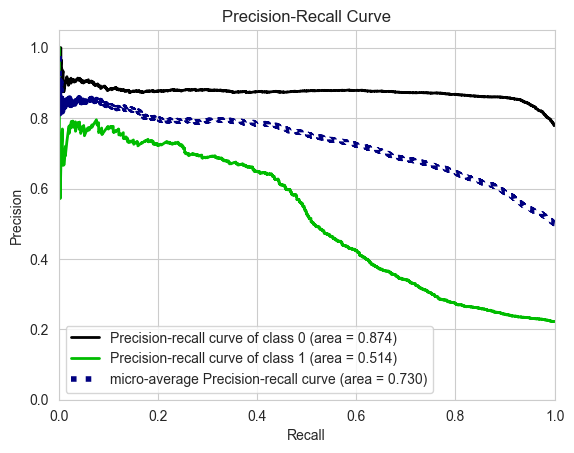

In [47]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(C=0.5, penalty="l1", solver="liblinear", class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [33]:
from sklearn.metrics import average_precision_score

y_test_dummies=pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:,1],y_pred_proba[:,1])

0.5133245552382275

In [34]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [35]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:,1],y_pred_proba[:,1])
log_f1 = f1_score(y_test, y_pred, average=None)
log_recall = recall_score(y_test, y_pred, average=None)

## 2. SVC

### Vanilla SVC model 

In [36]:
from sklearn.svm import SVC

In [37]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

pipe_svc_model = Pipeline(steps=operations_svc)

In [38]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[3933  740]
 [ 595  732]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4673
           1       0.50      0.55      0.52      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000


Train_Set
[[15712  2979]
 [ 2322  2987]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86     18691
           1       0.50      0.56      0.53      5309

    accuracy                           0.78     24000
   macro avg       0.69      0.70      0.69     24000
weighted avg       0.79      0.78      0.78     24000



In [39]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = "f1", cv = 5,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_score     0.519703
train_score    0.530403
dtype: float64

###  SVC Model GridsearchCV

In [40]:
param_grid = {
    'svc__C': [.5,1],
    'svc__gamma': ["scale", "auto", 0.01]
}

In [41]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring="recall",
                              n_jobs=-1,return_train_score=True)

In [42]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True, scoring='recall', verbose=3)

In [43]:
svm_model_grid.best_params_

{'svc__C': 0.5, 'svc__gamma': 0.01}

In [44]:
svm_model_grid.best_index_

2

In [45]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[3800  873]
 [ 581  746]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4673
           1       0.46      0.56      0.51      1327

    accuracy                           0.76      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.78      0.76      0.77      6000


Train_Set
[[15077  3614]
 [ 2390  2919]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     18691
           1       0.45      0.55      0.49      5309

    accuracy                           0.75     24000
   macro avg       0.65      0.68      0.66     24000
weighted avg       0.77      0.75      0.76     24000



In [51]:
model.decision_function(X_test)

array([ 0.02416962, -0.96324677, -1.03303884, ..., -0.62260573,
       -0.99917687, -0.82586586])

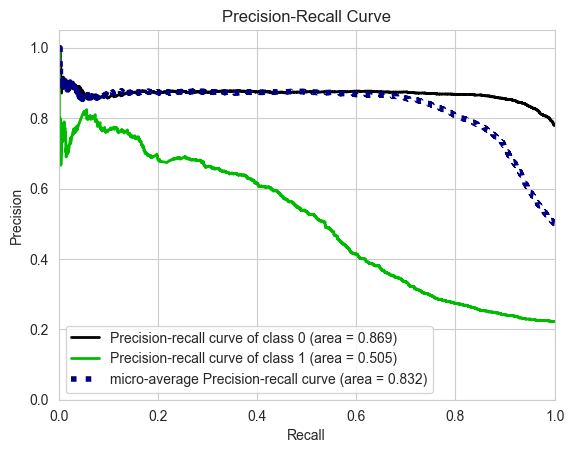

In [53]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=.5,gamma=0.01, probability=True,class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

model.fit(X_train, y_train)

decision_function=model.decision_function(X_test)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test,y_pred_proba)
plt.show();

In [56]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:,1],y_pred_proba[:,1])
svc_f1 = f1_score(y_test, y_pred, average=None)
svc_recall = recall_score(y_test, y_pred, average=None)

## 3. RF

### Vanilla RF Model

In [57]:
cat

Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')

In [58]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [59]:
from sklearn.ensemble import RandomForestClassifier


operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [60]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[4465  208]
 [ 869  458]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4673
           1       0.69      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Train_Set
[[18691     0]
 [    1  5308]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18691
           1       1.00      1.00      1.00      5309

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



In [62]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = "f1", cv = 5,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_score     0.442474
train_score    0.999976
dtype: float64

### RF Model GridsearchCV

In [63]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]} 

In [65]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring="recall",
                             n_jobs=-1, return_train_score=True)

In [66]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=Tr

In [67]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=500, random_state=101))])

In [68]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 500}

In [69]:
rf_grid_model.best_index_

3

In [70]:
pd.DataFrame(rf_grid_model.cv_results_).loc[3,['mean_test_score','mean_train_score']]

mean_test_score     0.585612
mean_train_score    0.588906
Name: 3, dtype: object

In [71]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[3916  757]
 [ 557  770]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4673
           1       0.50      0.58      0.54      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.79      6000


Train_Set
[[15532  3159]
 [ 2186  3123]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85     18691
           1       0.50      0.59      0.54      5309

    accuracy                           0.78     24000
   macro avg       0.69      0.71      0.70     24000
weighted avg       0.79      0.78      0.78     24000



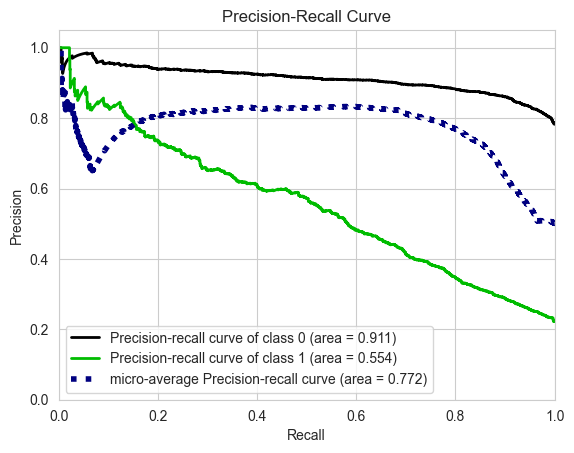

In [72]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                       max_depth=3,
                                                                                       n_estimators=500,
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test,y_pred_proba)
plt.show();

In [73]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:,1],y_pred_proba[:,1])
rf_f1 = f1_score(y_test, y_pred, average=None)
rf_recall = recall_score(y_test, y_pred, average=None)

## 4. XGBoost

### Vanilla XGBoost Model

In [75]:
from xgboost import XGBClassifier

In [76]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train, XGB_model__eval_metric='logloss')

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1,...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               mono

In [77]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[4419  254]
 [ 813  514]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.39      0.49      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.67      0.69      6000
weighted avg       0.81      0.82      0.80      6000


Train_Set
[[18273   418]
 [ 2293  3016]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     18691
           1       0.88      0.57      0.69      5309

    accuracy                           0.89     24000
   macro avg       0.88      0.77      0.81     24000
weighted avg       0.89      0.89      0.88     24000



In [78]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.64202022, 0.64202022, 0.64202022, ..., 0.64202022, 0.64202022,
       0.64202022])

In [79]:
my_dict={'weights':classes_weights, 'label':y_train}
comp = pd.DataFrame(my_dict)
comp.head()

,weights,label
987,0.64202,0
24779,0.64202,0
6504,0.64202,0
20570,0.64202,0
14478,0.64202,0


In [81]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__eval_metric='logloss',XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1,...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               mono

In [82]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[3859  814]
 [ 539  788]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4673
           1       0.49      0.59      0.54      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.77      0.78      6000


Train_Set
[[16306  2385]
 [  689  4620]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     18691
           1       0.66      0.87      0.75      5309

    accuracy                           0.87     24000
   macro avg       0.81      0.87      0.83     24000
weighted avg       0.89      0.87      0.88     24000



In [83]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring = "f1", cv = 5,return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights,'XGB_model__eval_metric':'logloss'})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_score     0.519019
train_score    0.787593
dtype: float64

### XGBoost Model GridsearchCV

In [84]:
param_grid = {"XGB_model__n_estimators":[20, 40],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [86]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring="recall", 
                              n_jobs = -1,
                              cv=5,
                              return_train_score=True
                             )

In [87]:
xgb_grid_model.fit(X_train, y_train, XGB_model__eval_metric='logloss',XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_...
                                              

In [88]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0....
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_co

In [89]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 0.8}

In [90]:
xgb_grid_model.best_index_

14

In [91]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[14,['mean_test_score','mean_train_score']]

mean_test_score     0.564139
mean_train_score    0.566773
Name: 14, dtype: object

In [92]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[3914  759]
 [ 579  748]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4673
           1       0.50      0.56      0.53      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000


Train_Set
[[15617  3074]
 [ 2315  2994]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85     18691
           1       0.49      0.56      0.53      5309

    accuracy                           0.78     24000
   macro avg       0.68      0.70      0.69     24000
weighted avg       0.79      0.78      0.78     24000



[00:50:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


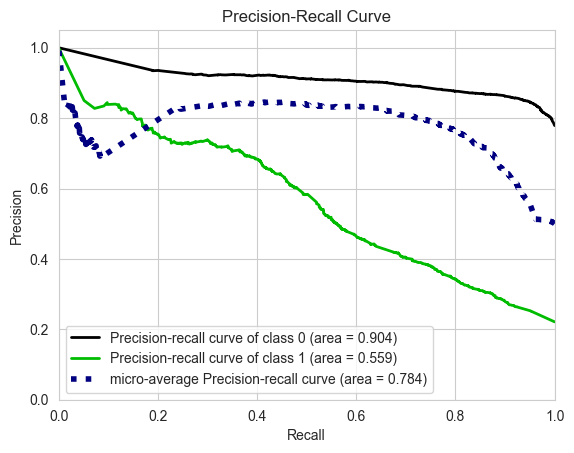

In [94]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                                            max_depth=2, n_estimators=40, random_state=101,
                                            subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [95]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None)
xgb_recall = recall_score(y_test, y_pred, average=None)

## Comparing Models

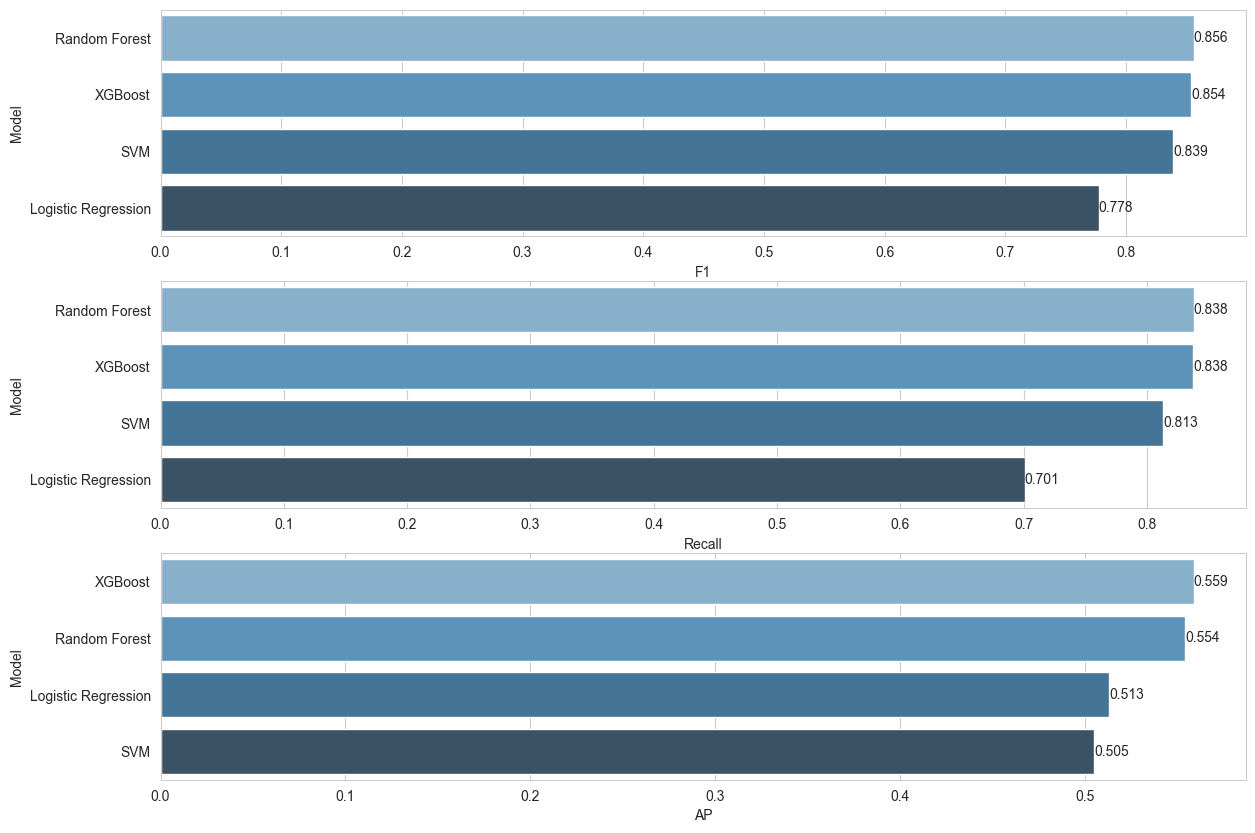

In [96]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___